In [1]:
import teacher_model as tm
import quantum_computer as qc
import quantum_trainer as qt
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Define my teacher model
my_teacher_model = tm.TeacherModel(verbose=False)
my_teacher_model.config(select_model="quad", x_lower_limit=-0.99, x_upper_limit=0.99, number_of_points=20, a=1.0, b=0, c=0)
#my_teacher_model.plot_model()

Note: Training Data is initialized


In [3]:
# Define quatnum_computer

# Data Encoding
my_quantum_encoding = qc.QuantumEncoding(verbose=False)
my_quantum_encoding.config(select_encoding="rzacos_ryasin")

# Entangling block
my_entangling = qc.HamlitonianMixerBlock(verbose=False)

# Single qubit rotation block
my_parameterised = qc.SingleQubitRotationBlock(verbose=False)

# Quantum Measurement
my_measurement = qc.QuantumMeasurement(verbose=False)
my_measurement.config(select_measurement = "first_qubit_Z")

# Package all components into a quantum computer
my_quantum_computer = qc.QuantumComputer(verbose=False)
my_quantum_computer.config(number_of_qubits=2, depth=2) 
my_quantum_computer.inputs(Encode=my_quantum_encoding, A=my_entangling, B=my_parameterised, Observable=my_measurement)

In [4]:
# Define quantum trainer
my_trainer = qt.QuantumTrainer(verbose=False)
my_trainer.config(select_optimiser = "GD", select_loss="sobolev_loss", max_training_steps=2000, learning_rate=0.001)
my_trainer.inputs(my_teacher_model, my_quantum_computer)

In [5]:
my_trainer.train()

107.82094181118457
38.413928355528995
31.952108075849853
28.036488259382615
25.027721029293918
22.52049770134472
20.358996410162923
18.47189928006142
16.823781943412037
15.395128438080736
14.172311580558057
13.142244953050401
12.28984815271912
11.59740691595475
11.045138458225425
10.612356396974782
10.278747512238839
10.025439428054069
9.835710463083029
9.695327883959305
9.59258075502108
9.51810362292604
9.464583771634308
9.426424829231568
9.399415566172342
9.380431673519874
9.367182720651412
9.358006398825019
9.351706477303598
9.347428301588614
9.344564985643375
9.342687829260626
9.341495356599603
9.340776379554267
9.340383455855548
9.340213952915377
9.340196618926639
9.340282107712078
9.340436321974167
9.340635753759079
9.34086423317975
9.341110665935018
9.34136746260657
9.341629450440825
9.34189312074639
9.34215610920534
9.342416837499325
9.342674266465336
9.342927726242761
9.343176799498462
9.343421241201899
9.343660923544368
9.343895798141451
9.344125870107586
9.344351180281537
9.

9.356358767231026
9.356359212250279
9.356359651392225
9.35636008473563
9.356360512358197
9.356360934336546
9.356361350746264
9.356361761661901
9.35636216715698
9.356362567304034
9.35636296217459
9.356363351839212
9.356363736367491
9.356364115828075
9.356364490288675
9.356364859816072
9.35636522447615
9.356365584333886
9.356365939453376
9.356366289897842
9.35636663572965
9.356366977010317
9.356367313800515
9.356367646160104
9.356367974148126
9.356368297822819
9.35636861724163
9.356368932461237
9.356369243537536
9.356369550525672
9.356369853480041
9.356370152454305
9.356370447501394
9.356370738673528
9.356371026022211
9.356371309598263
9.3563715894518
9.35637186563228
9.356372138188476
9.356372407168516
9.35637267261986
9.356372934589348
9.356373193123172
9.356373448266911
9.356373700065522
9.356373948563355
9.356374193804175
9.356374435831142
9.356374674686844
9.356374910413292
9.356375143051931
9.35637537264365
9.356375599228786
9.356375822847138
9.356376043537963
9.356376261339996
9.3

9.35639271609785
9.356392717212811
9.356392718313463
9.356392719399997
9.35639272047259
9.35639272153142
9.356392722576668
9.356392723608504
9.356392724627105
9.356392725632636
9.356392726625268
9.356392727605163
9.356392728572489
9.356392729527407
9.356392730470072
9.356392731400645
9.35639273231928
9.35639273322613
9.356392734121348
9.35639273500508
9.356392735877478
9.356392736738684
9.356392737588843
9.356392738428097
9.356392739256584
9.356392740074444
9.356392740881814
9.356392741678828
9.356392742465617
9.356392743242314
9.35639274400905
9.356392744765952
9.35639274551314
9.35639274625075
9.356392746978898
9.356392747697704
9.356392748407293
9.356392749107782
9.356392749799284
9.356392750481916
9.356392751155795
9.35639275182103
9.356392752477731
9.356392753126013
9.35639275376598
9.356392754397739
9.356392755021396
9.356392755637053
9.356392756244814
9.35639275684478
9.356392757437053
9.35639275802173
9.35639275859891
9.356392759168685
9.356392759731156
9.356392760286411
9.3563

9.35639280281662
9.356392802819535
9.356392802822414
9.356392802825255
9.35639280282806
9.356392802830829
9.356392802833563
9.35639280283626
9.356392802838922
9.356392802841551
9.356392802844148
9.356392802846711
9.35639280284924
9.356392802851737
9.356392802854202
9.356392802856636
9.356392802859041
9.35639280286141
9.356392802863752
9.356392802866063
9.356392802868346
9.356392802870598
9.356392802872822
9.356392802875018
9.356392802877185
9.356392802879324
9.356392802881436
9.35639280288352
9.356392802885578
9.35639280288761
9.356392802889617
9.356392802891595
9.35639280289355
9.35639280289548
9.356392802897386
9.356392802899265
9.35639280290112
9.356392802902954
9.356392802904761
9.35639280290655
9.356392802908312
9.356392802910053
9.356392802911772
9.356392802913467
9.356392802915142
9.356392802916794
9.356392802918426
9.35639280292004
9.35639280292163
9.3563928029232
9.356392802924749
9.356392802926276
9.35639280292779
9.356392802929278
9.35639280293075
9.356392802932206
9.3563928

9.35639280304358
9.356392803043587
9.356392803043594
9.356392803043601
9.35639280304361
9.356392803043617
9.356392803043622
9.35639280304363
9.356392803043638
9.356392803043644
9.35639280304365
9.356392803043658
9.356392803043665
9.356392803043672
9.356392803043676
9.356392803043683
9.35639280304369
9.356392803043695
9.356392803043702
9.35639280304371
9.356392803043715
9.35639280304372
9.356392803043727
9.356392803043732
9.35639280304374
9.356392803043743
9.356392803043748
9.356392803043756
9.356392803043759
9.356392803043764
9.356392803043772
9.356392803043775
9.35639280304378
9.356392803043786
9.356392803043791
9.356392803043796
9.3563928030438
9.356392803043805
9.35639280304381
9.356392803043816
9.35639280304382
9.356392803043825
9.356392803043828
9.356392803043834
9.356392803043837
9.356392803043844
9.356392803043846
9.35639280304385
9.356392803043855
9.356392803043859
9.356392803043864
9.356392803043867
9.356392803043871
9.356392803043875
9.35639280304388
9.356392803043882
9.35639

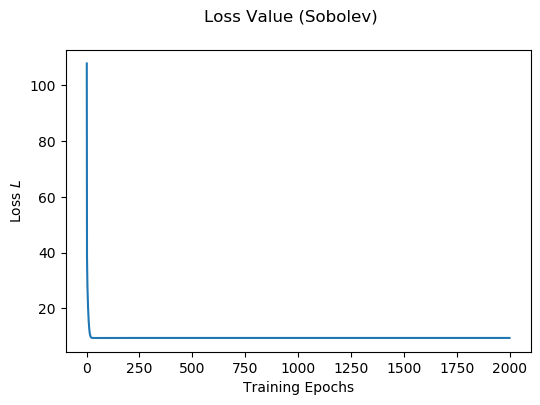

In [6]:
my_trainer.quantum_result_store.plot_loss()

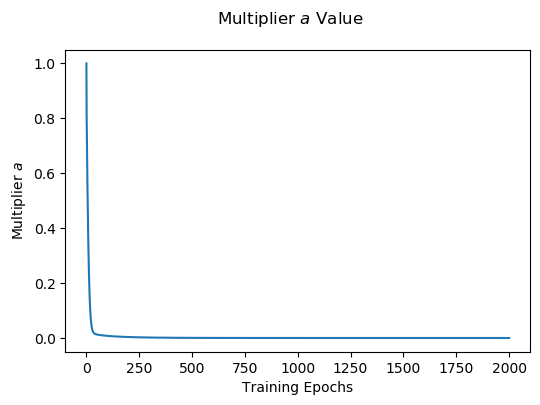

In [7]:
my_trainer.quantum_result_store.plot_a()

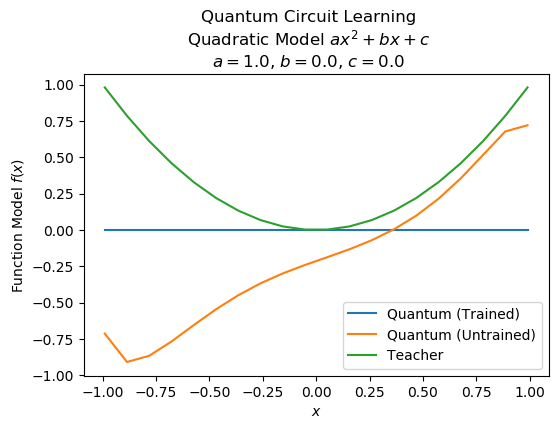

In [8]:
my_trainer.quantum_result_store.plot_final_result()

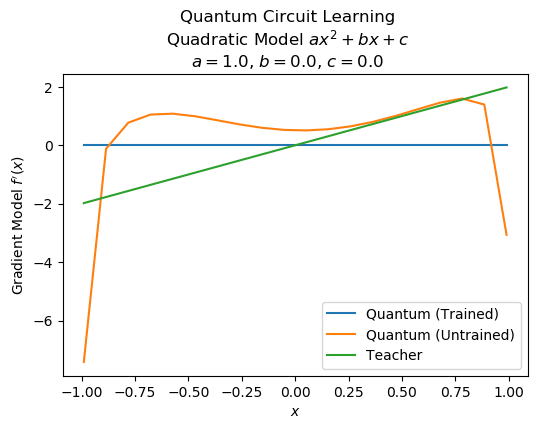

In [9]:
my_trainer.quantum_result_store.plot_final_result_gradient()